In [1]:
import os

from mysql import connector
from dotenv import load_dotenv

# Access environment variables
load_dotenv()

NAME = os.getenv("DB_NAME")
USER = os.getenv("DB_USER")
PASSWORD = os.getenv("DB_PASSWORD")
IP = os.getenv("DB_IP")
PORT = os.getenv("DB_PORT")

In [2]:
class Database:
    _connection = None  # 클래스 변수로 연결 상태 관리

    @staticmethod
    def get_connection():
        if Database._connection is None or not Database._connection.is_connected():
            Database._connection = connector.connect(
                database = NAME,
                user = USER,
                password = PASSWORD,
                host = IP,
                port = PORT
            )
        return Database._connection

In [12]:
def execute(query, values=None):
    try:
        conn = Database.get_connection()
        cursor = conn.cursor()

        # values가 있으면 쿼리와 함께 전달
        if values:
            cursor.execute(query, values)
        else:
            cursor.execute(query)

        rows = cursor.fetchall()
        cursor.close()
        return rows
    except connector.Error as e:
        print(f"Error: {e}")

In [13]:
execute("SHOW TABLES")

[('DDC_count',),
 ('ISBN_rent_count',),
 ('None_ISBN_rent_count',),
 ('auth_group',),
 ('auth_group_permissions',),
 ('auth_permission',),
 ('auth_user',),
 ('auth_user_groups',),
 ('auth_user_user_permissions',),
 ('book',),
 ('django_admin_log',),
 ('django_content_type',),
 ('django_migrations',),
 ('django_session',),
 ('recent_rent',),
 ('rent',),
 ('rent_count',)]

In [14]:
import pandas as pd
import numpy as np

In [42]:
data = execute("SELECT * FROM book")

In [99]:
df = pd.DataFrame(data, columns=[
            'ID', '등록연도', '등록월', '수서방법',
            '분류코드', 'ISBN', '제목', '작가', '출판사', '출판연도', '소장위치'
        ])

In [100]:
df.head()

,ID,등록연도,등록월,수서방법,분류코드,ISBN,제목,작가,출판사,출판연도,소장위치
0,SS_000001,1982,7,수서정보없음,232,9780664244507,Jesus Christ for today,"Stroup, George W",Westminster Press,1982,보존서고
1,SS_000002,1982,7,수서정보없음,808.04207,9780582553712,Learning to write :first language/second langu...,CCTE Conference,Longman,1983,4층인문
2,SS_000003,1982,7,수서정보없음,808.06,9780316483148,"Communication, writing and speaking","Martin, Celest A","Little, Brown",1983,보존서고
3,SS_000004,1982,7,수서정보없음,796.334,9780890371817,Intermediate soccer,"Moffat, Bobby",Anderson World,1982,보존서고
4,SS_000005,1982,7,수서정보없음,808.06,9780137744305,Research writing :a complete guide to research...,"Memering, Dean",Prentice-Hall,1983,보존서고


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299315 entries, 0 to 299314
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      299315 non-null  object
 1   등록연도    299315 non-null  int64 
 2   등록월     299315 non-null  int64 
 3   수서방법    299315 non-null  object
 4   분류코드    299315 non-null  object
 5   ISBN    299315 non-null  object
 6   제목      299315 non-null  object
 7   작가      299315 non-null  object
 8   출판사     299315 non-null  object
 9   출판연도    299315 non-null  object
 10  소장위치    299315 non-null  object
dtypes: int64(2), object(9)
memory usage: 25.1+ MB


In [102]:
df['분류코드'] = df['분류코드'].astype(float)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299315 entries, 0 to 299314
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      299315 non-null  object 
 1   등록연도    299315 non-null  int64  
 2   등록월     299315 non-null  int64  
 3   수서방법    299315 non-null  object 
 4   분류코드    299315 non-null  float64
 5   ISBN    299315 non-null  object 
 6   제목      299315 non-null  object 
 7   작가      299315 non-null  object 
 8   출판사     299315 non-null  object 
 9   출판연도    299315 non-null  object 
 10  소장위치    299315 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 25.1+ MB


In [104]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False) 

In [105]:
# 구간 설정: 0부터 1000까지 10 단위, 오른쪽 미포함(right=False)
bins = range(0, 1001, 100)

# 라벨을 3자리 문자열(000, 010, 020...)로 만들기
labels = [f"{x:03d}" for x in range(0, 1000, 100)]

cut_large = pd.cut(df['분류코드'], bins=bins, right=False, labels=labels)

df['대분류'] = cut_large
df.head()

,ID,등록연도,등록월,수서방법,분류코드,ISBN,제목,작가,출판사,출판연도,소장위치,대분류
0,SS_000001,1982,7,수서정보없음,232.00000,9780664244507,Jesus Christ for today,"Stroup, George W",Westminster Press,1982,보존서고,200
1,SS_000002,1982,7,수서정보없음,808.04207,9780582553712,Learning to write :first language/second langu...,CCTE Conference,Longman,1983,4층인문,800
2,SS_000003,1982,7,수서정보없음,808.06000,9780316483148,"Communication, writing and speaking","Martin, Celest A","Little, Brown",1983,보존서고,800
3,SS_000004,1982,7,수서정보없음,796.33400,9780890371817,Intermediate soccer,"Moffat, Bobby",Anderson World,1982,보존서고,700
4,SS_000005,1982,7,수서정보없음,808.06000,9780137744305,Research writing :a complete guide to research...,"Memering, Dean",Prentice-Hall,1983,보존서고,800


In [106]:
# 구간 설정: 0부터 1000까지 10 단위, 오른쪽 미포함(right=False)
bins = range(0, 1001, 10)

# 라벨을 3자리 문자열(000, 010, 020...)로 만들기
labels = [f"{x:03d}" for x in range(0, 1000, 10)]

cut_medium = pd.cut(df['분류코드'], bins=bins, right=False, labels=labels)

df['중분류'] = cut_medium
df.head()

,ID,등록연도,등록월,수서방법,분류코드,ISBN,제목,작가,출판사,출판연도,소장위치,대분류,중분류
0,SS_000001,1982,7,수서정보없음,232.00000,9780664244507,Jesus Christ for today,"Stroup, George W",Westminster Press,1982,보존서고,200,230
1,SS_000002,1982,7,수서정보없음,808.04207,9780582553712,Learning to write :first language/second langu...,CCTE Conference,Longman,1983,4층인문,800,800
2,SS_000003,1982,7,수서정보없음,808.06000,9780316483148,"Communication, writing and speaking","Martin, Celest A","Little, Brown",1983,보존서고,800,800
3,SS_000004,1982,7,수서정보없음,796.33400,9780890371817,Intermediate soccer,"Moffat, Bobby",Anderson World,1982,보존서고,700,790
4,SS_000005,1982,7,수서정보없음,808.06000,9780137744305,Research writing :a complete guide to research...,"Memering, Dean",Prentice-Hall,1983,보존서고,800,800


In [107]:
# NaN 값 필터링
nan_rows = df[df['중분류'].isna()]

print(nan_rows)

              ID  등록연도  등록월  수서방법    분류코드           ISBN    제목   작가       출판사  \
43012  SS_043176  2011    6  사서선정  9151.0  9788962283532  동경잡기  민주면  지식을만드는지식   
43013  SS_043177  2011    6  사서선정  9151.0  9788962283532  동경잡기  민주면  지식을만드는지식   

       출판연도  소장위치  대분류  중분류  
43012  2009  4층인문  NaN  NaN  
43013  2009  4층인문  NaN  NaN  


In [108]:
df = df.dropna(subset=['중분류'])

대분류
000    23803
100    54361
200    53478
300     5516
400    30914
500        7
600    10293
700    41153
800    14937
900    64851
Name: count, dtype: int64


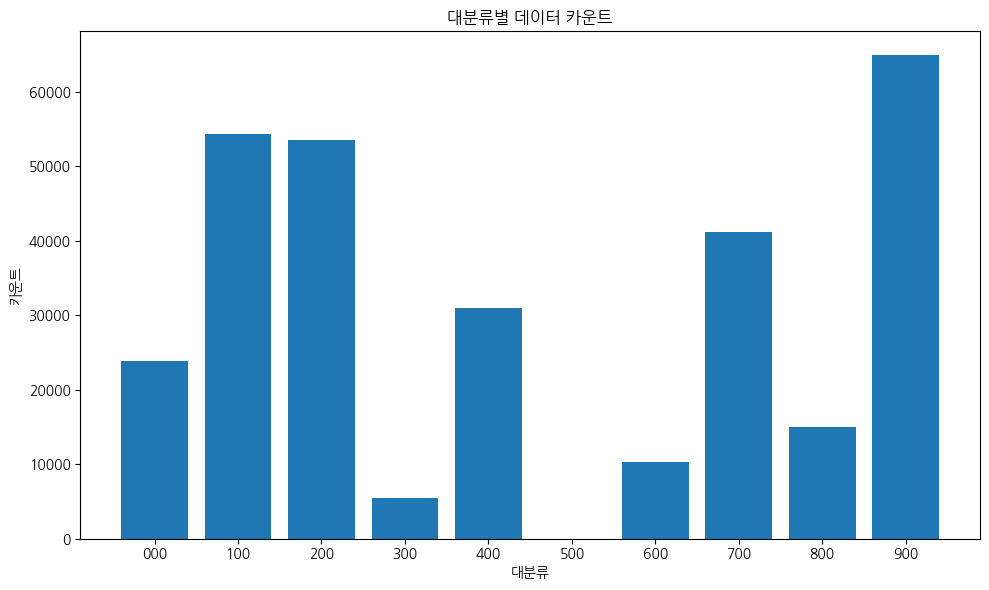

In [109]:
# 분류별 카운트
count_large = df['대분류'].value_counts().sort_index()
print(count_large)

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(count_large.index.astype(str), count_large.values, width=0.8)
plt.xlabel("대분류")
plt.ylabel("카운트")
plt.title("대분류별 데이터 카운트")
plt.tight_layout()  # 그래프 레이아웃 조정
plt.show()

중분류
000     2890
010     2252
020     4286
030     2068
040       19
       ...  
950    32207
960      318
970     2238
980      259
990       80
Name: count, Length: 100, dtype: int64


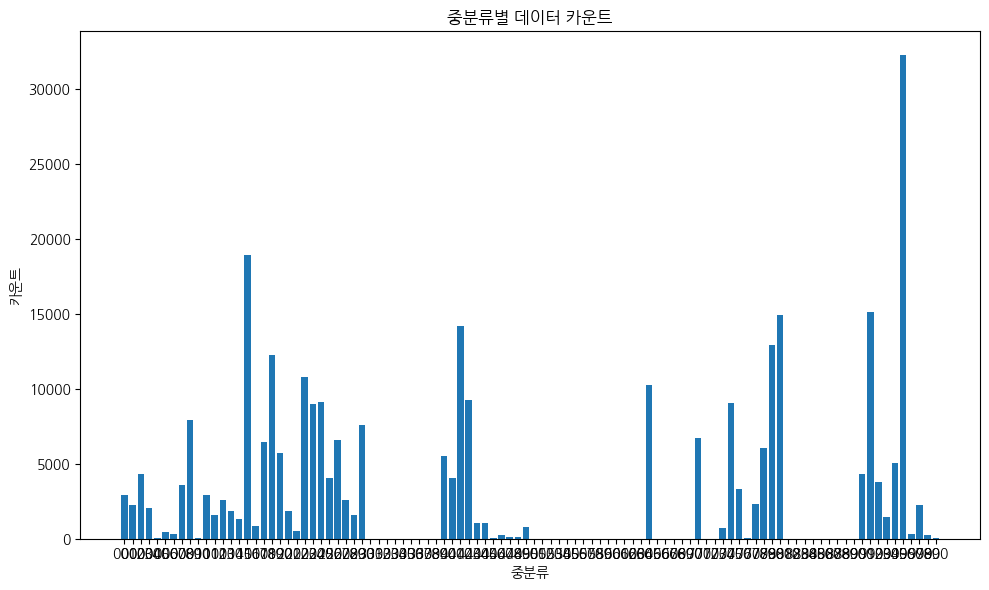

In [118]:
# 분류별 카운트
count_medium = df['중분류'].value_counts().sort_index()
print(count_medium)

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(count_medium.index.astype(str), count_medium.values, width=0.8)
plt.xlabel("중분류")
plt.ylabel("카운트")
plt.title("중분류별 데이터 카운트")
plt.tight_layout()  # 그래프 레이아웃 조정
plt.show()

In [127]:
# 백의 자리와 십의 자리 추출
df['백의자리']= df['중분류'].str[0].astype(int)  # 첫 번째 문자 (백의 자리)
df['십의자리'] = df['중분류'].str[1].astype(int)  # 두 번째 문자 (십의 자리)
count_df = df.groupby(['백의자리', '십의자리']).size().reset_index(name='카운트')


count = pd.DataFrame({
    '백의자리': df['백의자리'],
    '십의자리': df['십의자리'],
    '카운트': df['카운트']
})

# 피벗 테이블 생성: 10x10 구조
pivot_df = count_df.pivot_table(
    columns='백의자리',
    index='십의자리',
    values='카운트',
    fill_value=0  # 빈 값은 0으로 채우기
)
# 결과 출력
pivot_df = pivot_df.astype(int)
pivot_df

백의자리,0,1,2,3,4,5,6,7,8,9
십의자리,,,,,,,,,,
0,2890,2914,1815,13,4062,0,0,6721,14924,4343
1,2252,1594,497,0,14178,5,2,0,10,15133
2,4286,2577,10762,3,9218,0,3,7,1,3798
3,2068,1817,9002,0,1071,0,1,727,0,1430
4,19,1310,9080,2,1056,0,10278,9028,0,5045
5,437,18904,4034,1,44,0,6,3290,2,32207
6,333,871,6559,1,266,0,1,76,0,318
7,3567,6429,2574,5,104,0,0,2343,0,2238
8,7917,12234,1563,1,136,2,0,6048,0,259
